[[-87.63118615  41.6966208 ]
 [-87.70955577  41.87835575]
 [-87.62064826  41.80820103]
 [-87.68625289  41.97998095]
 [-87.66483327  41.77329615]
 [-87.58551332  41.7554881 ]
 [-87.75726617  41.89378441]]
[[-87.580749    41.75078115]
 [-87.71044143  41.87504838]
 [-87.66448087  41.7761109 ]
 [-87.63505496  41.70537571]
 [-87.75473878  41.89010771]
 [-87.68522419  41.98536496]
 [-87.61873093  41.79253694]]


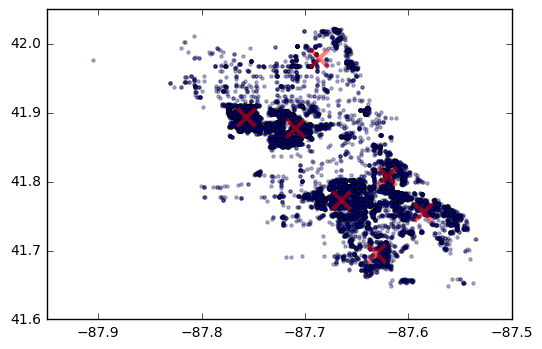

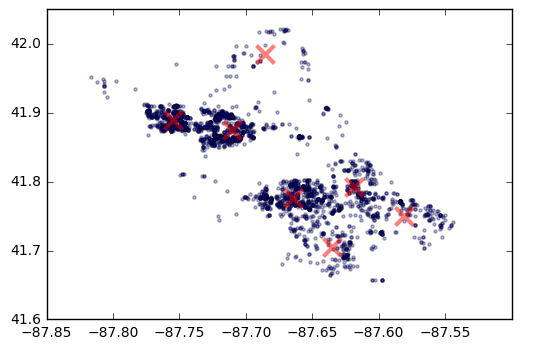

In [41]:
#Asg1
#Import whatever needs to be imported to make this work
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#matplotlib.style.use('ggplot')
#plt.style.use('ggplot')


#To procure the dataset:
#https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
#Filter for'GAMBLING':

df = pd.read_csv('C:/Users/nsalehi/Desktop/DAT210x-master/DAT210x-master/Module5/Datasets/Crimes_-_2001_to_present.csv')

def doKMeans(df):
    #Plot your data with a '.' marker, with 0.3 alpha at the Longitude:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    #Filter df for Longitude and Latitude:
    df = df[['Longitude', 'Latitude']]
    df = df.dropna()
  

    #K-Means to find seven cluster centers in this df:
    from sklearn.cluster import KMeans
    model = KMeans(n_clusters=7)
    model.fit(df)
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
        n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
        verbose=0)
    
    #Print and plot the centroids...
    centroids = model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    print centroids


#Print & Plot data
doKMeans(df)

#Filter out the data for Date > '2011-01-01':
df = df[df.Year>=2011]

#Print & Plot your data:
doKMeans(df)
plt.show()

4638472273
[[-96.70839404  32.73299989]]


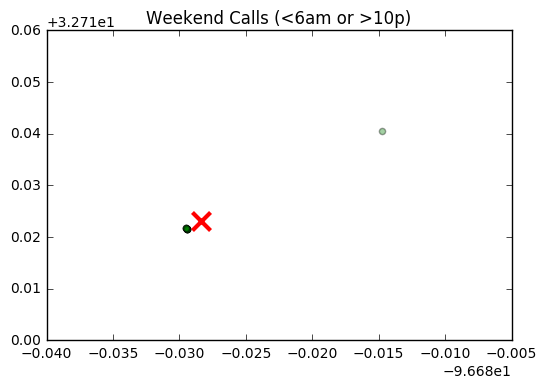

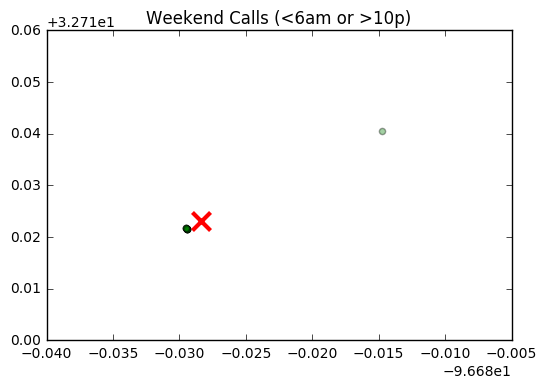

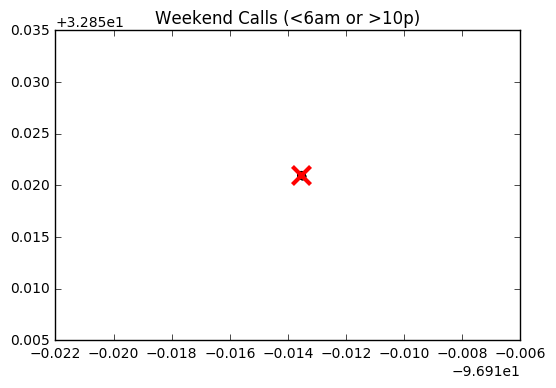

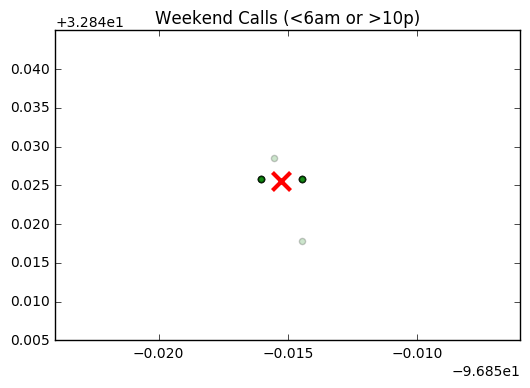

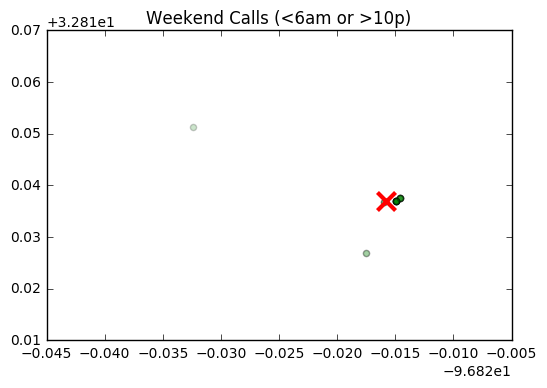

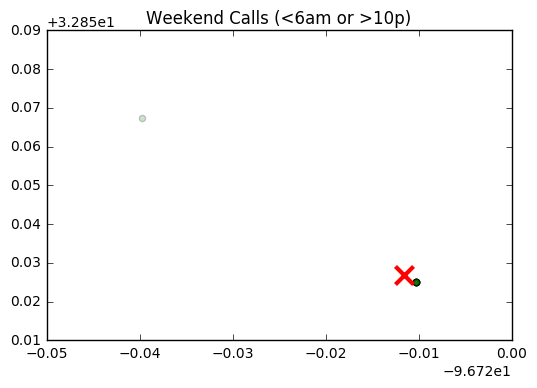

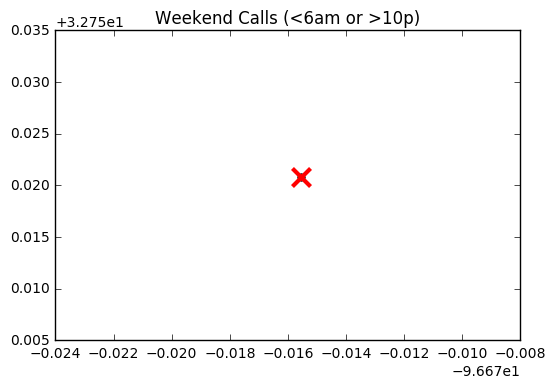

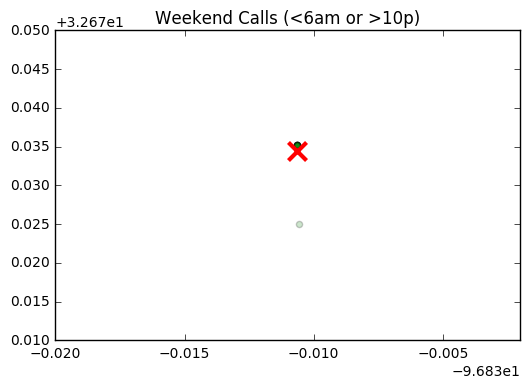

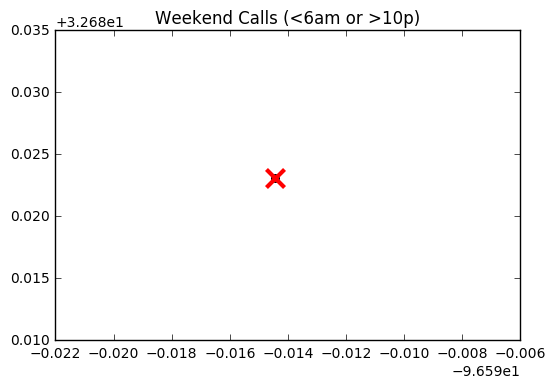

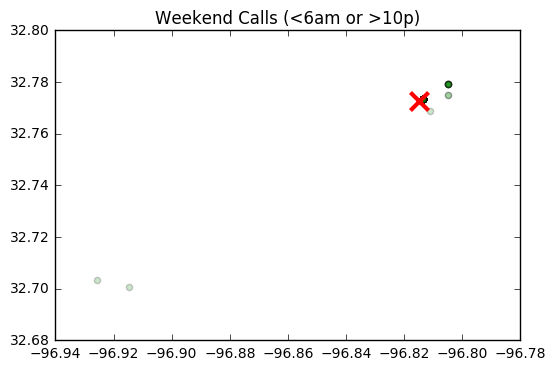

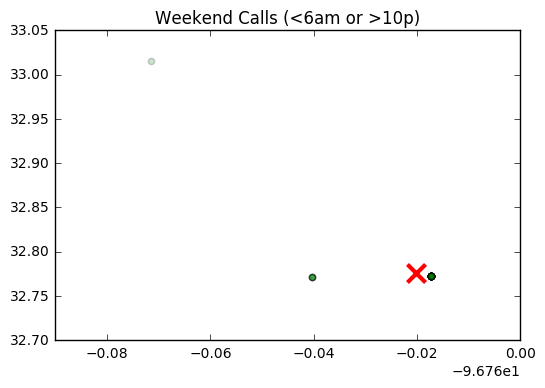

In [99]:
#Asg2
#matplotlib.style.use('ggplot') # Look Pretty
import numpy as np
from datetime import timedelta

def showandtell(title=None):
  if title != None: plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
  plt.show()
  # exit()



#Load up the dataset and take a peek at its head:
df = pd.read_csv('C:/Users/nsalehi/Desktop/DAT210x-master/DAT210x-master/Module5/Datasets/CDR.csv')
df.head()

# Convert the date using pd.to_datetime, and the time using pd.to_timedelta
df['CallDate'] = pd.to_datetime(df['CallDate'], errors = 'coerce')
df['CallTime'] = pd.to_timedelta(df['CallTime'], errors = 'coerce')

distinct_in = np.array(df['In'].unique())

#Create a slice called user1 that filters to only include dataset records where the
# "In" feature (user phone number) is equal to the first number in unique list above;

user1=df[df.In == distinct_in[0]]
print distinct_in[0]
#Plot all the call locations:
#user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
#showandtell()


#The locations map above should be too "busy" to really wrap your head around. This
# is where domain expertise comes into play. Your intuition tells you that people are likely
# to behave differently on weekends:
#
# On Weekdays:
#   1. People probably don't go into work
#   2. They probably sleep in late on Saturday
#   3. They probably run a bunch of random errands, since they couldn't during the week
#   4. They should be home, at least during the very late hours, e.g. 1-4 AM
#
# On Weekdays:
#   1. People probably are at work during normal working hours
#   2. They probably are at home in the early morning and during the late night
#   3. They probably spend time commuting between work and home everyday


user1=user1.loc[(user1.DOW == 'Sun') | (user1.DOW == 'Sat')]


#Further filter it down for calls that are came in either before 6AM OR after 10pm (22:00:00).
#military time strings, eg: "06:00:00", "22:00:00": https://en.wikipedia.org/wiki/24-hour_clock

user1=user1.loc[(user1.CallTime <= "06:00:00") | (user1.CallTime >= "22:00:00")]

#Visualize the dataframe with a scatter plot as a sanity check. Since you're familiar
# with maps, you know well that your X-Coordinate should be Longitude, and your Y coordinate
# should be the tower Latitude. Check the dataset headers for proper column feature names.
# https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude
#
# At this point, you don't yet know exactly where the user is located just based off the cell
# phone tower position data; but considering the below are for Calls that arrived in the twilight
# hours of weekends, it's likely that wherever they are bunched up is probably near where the
# caller's residence:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')
#showandtell()



#
# TODO: Run K-Means with a K=1. There really should only be a single area of concentration. If you
# notice multiple areas that are "hot" (multiple areas the usr spends a lot of time at that are FAR
# apart from one another), then increase K=2, with the goal being that one of the centroids will
# sweep up the annoying outliers; and the other will zero in on the user's approximate home location.
# Or rather the location of the cell tower closest to their home.....
#
# Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
# data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
# no feature scaling is required. Print out the centroid locations and add them onto your scatter
# plot. Use a distinguishable marker and color.
#
# Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.

from sklearn.cluster import KMeans
model = KMeans(n_clusters=1)
model.fit(user1[['TowerLon','TowerLat']])
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#Print and plot the centroids...
centroids = model.cluster_centers_
ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=1, linewidths=3, s=169)
print centroids
showandtell()

for i in range(len(distinct_in)):
    user1=df[df.In == distinct_in[i]]
    user1=user1.loc[(user1.DOW == 'Sun') | (user1.DOW == 'Sat')]
    user1=user1.loc[(user1.CallTime <= "06:00:00") | (user1.CallTime >= "22:00:00")]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
    ax.set_title('Weekend Calls (<6am or >10p)')

    model = KMeans(n_clusters=1)
    model.fit(user1[['TowerLon','TowerLat']])
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
        n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
        verbose=0)

    centroids = model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=1, linewidths=3, s=169)
showandtell()




Examining person:  4638472273
[[-96.90951639  32.9000009 ]
 [-96.70816184  32.73323174]
 [-96.83818346  32.86348712]]

  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:49:53.168115


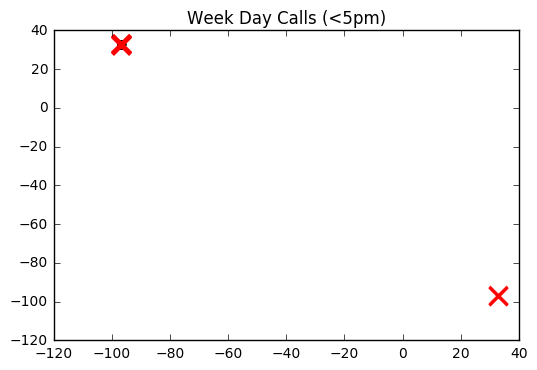



Examining person:  1559410755
[[-96.9164561   32.73762409]
 [-96.93522725  32.69557708]
 [-96.92355104  32.87096795]]

  Cluster With Fewest Samples:  0
    Its Waypoint Time:  0 days 07:50:31.646646


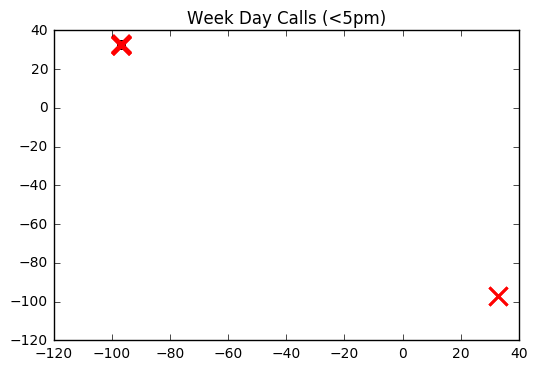



Examining person:  4931532174
[[-96.89338791  32.77992299]
 [-96.86563953  32.86562866]
 [-96.88911725  32.81309497]]

  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:53:05.627397


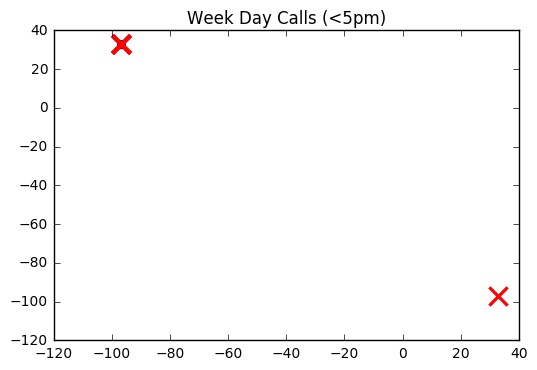



Examining person:  2419930464
[[-96.83511392  32.84684682]
 [-96.8472893   32.85371225]
 [-96.849683    32.86284941]]

  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 11:09:10.422402


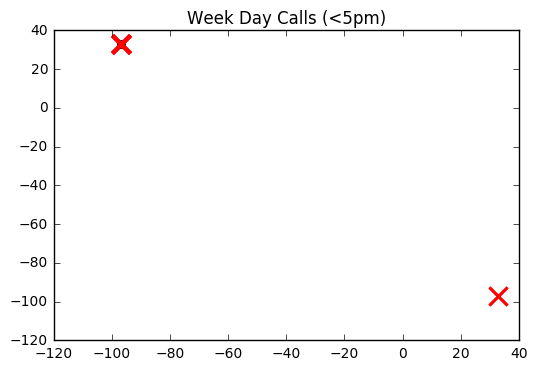



Examining person:  1884182865
[[-96.75768121  32.92195886]
 [-96.730278    32.875     ]
 [-96.741944    32.909167  ]]

  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:48:00.978543


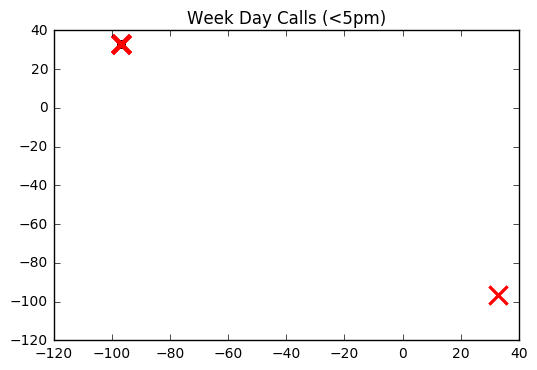



Examining person:  3688089071
[[-96.87034706  32.81198486]
 [-96.685556    32.770833  ]
 [-96.81450799  32.80241723]]

  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:46:28.366518


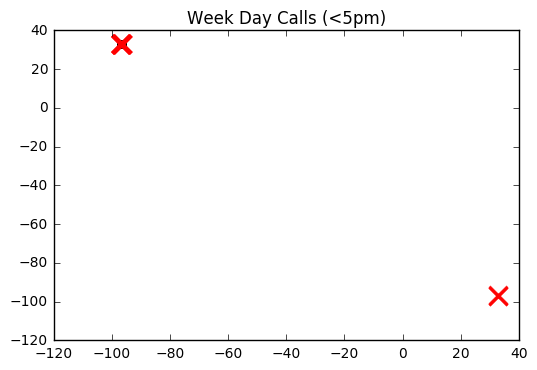



Examining person:  4555003213
[[-96.74437494  32.75203793]
 [-96.84066398  32.70494423]
 [-96.796111    32.7375    ]]

  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:58:52.698478


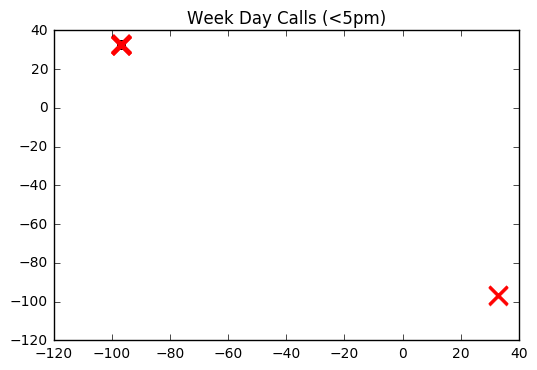



Examining person:  2068627935
[[-96.83039184  32.72097347]
 [-96.604444    32.703056  ]
 [-96.75520357  32.71410598]]

  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:49:09.050047


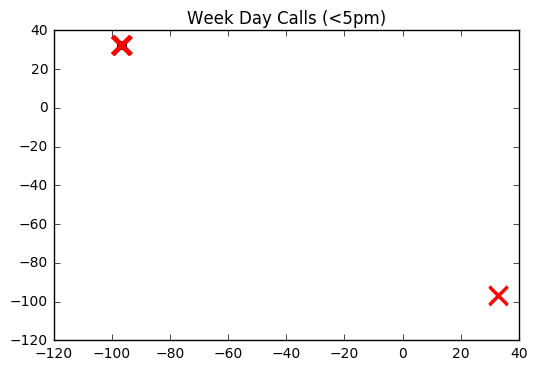



Examining person:  2894365987
[[-96.89115458  32.72145328]
 [-96.81270407  32.77396536]
 [-96.857611    32.741889  ]]

  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:48:21.025597


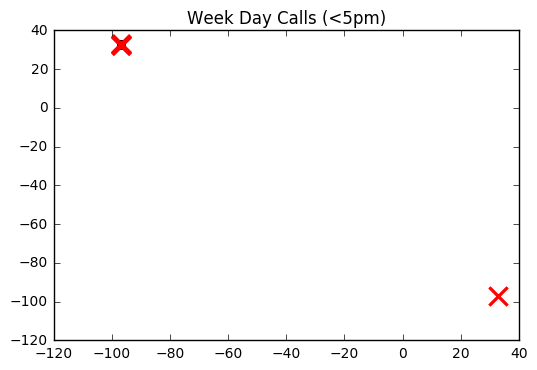



Examining person:  8549533077
[[-96.77896656  32.77240328]
 [-96.80262338  32.98500948]
 [-96.80360535  32.93033402]]

  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:51:00.414270


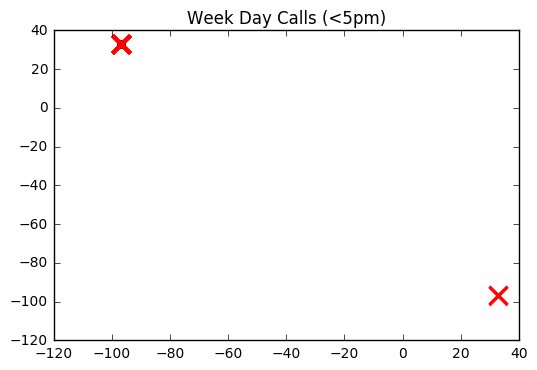

In [113]:
def showandtell(title=None):
  if title != None: plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
  plt.show()
  # exit()

def clusterInfo(model):
  print "Cluster Analysis Inertia: ", model.inertia_
  print '------------------------------------------'
  for i in range(len(model.cluster_centers_)):
    print "\n  Cluster ", i
    print "    Centroid ", model.cluster_centers_[i]
    print "    #Samples ", (model.labels_==i).sum() # NumPy Power

# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
  # Ensure there's at least on cluster...
  minSamples = len(model.labels_)
  minCluster = 0
  for i in range(len(model.cluster_centers_)):
    if minSamples > (model.labels_==i).sum():
      minCluster = i
      minSamples = (model.labels_==i).sum()
  print "\n  Cluster With Fewest Samples: ", minCluster
  return (model.labels_==minCluster)

def doKMeans(data, num_clusters):
    from sklearn.cluster import KMeans
    model = KMeans(n_clusters=num_clusters)
    model.fit(user1[['TowerLon','TowerLat']])
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=num_clusters, n_init=10,
        n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
        verbose=0)
    return model



#Load up the dataset and take a peek at its head and dtypes.
#Convert the date using pd.to_datetime, and the time using pd.to_timedelta
df = pd.read_csv('C:/Users/nsalehi/Desktop/DAT210x-master/DAT210x-master/Module5/Datasets/CDR.csv')
df['CallDate'] = pd.to_datetime(df['CallDate'], errors = 'coerce')
df['CallTime'] = pd.to_timedelta(df['CallTime'], errors = 'coerce')
distinct_in = np.array(df['In'].unique())
for i in range(len(distinct_in)):
    user1=df[df.In == distinct_in[i]]
    #Slice so that it includes only Weekday (Mon-Fri) values.
    user1=user1.loc[(user1.DOW != 'Sun') & (user1.DOW != 'Sat')]
    #The idea is that the call was placed before 5pm. 
    user1=user1.loc[user1.CallTime <= "17:00:00"]

    print "\n\nExamining person: ",  distinct_in[i]
    # TODO: Plot the Cell Towers the user connected to
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
    ax.set_title('Week Day Calls (<5pm)')

    
    #Run K-Means with K=3 or K=4. There really should only be a two areas of concentration. If you
    # notice multiple areas that are "hot" (multiple areas the usr spends a lot of time at that are FAR
    # apart from one another):

    model = doKMeans(user1[['TowerLon','TowerLat']], 3)

    #Print and plot the centroids...
    centroids = model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=1, linewidths=3, s=169)
    print centroids

    #Print out the mean CallTime value for the samples belonging to the cluster with the LEAST
    # samples attached to it. If our logic is correct, the cluster with the MOST samples will be work.
    # The cluster with the 2nd most samples will be home. And the K=3 cluster with the least samples
    # should be somewhere in between the two. What time, on average, is the user in between home and
    # work, between the midnight and 5pm?
    midWayClusterIndices = clusterWithFewestSamples(model)
    midWaySamples = user1[midWayClusterIndices]
    print "    Its Waypoint Time: ", midWaySamples.CallTime.mean()
    
    # Let's visualize the results!
    # First draw the X's for the clusters:
    ax.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,0], s=169, c='r', marker='x', alpha=0.8, linewidths=2)

    # Then save the results:
    showandtell('Weekday Calls Centroids')  # Comment this line out when you're ready to proceed


In [141]:
from sklearn import preprocessing


#Parameters to play around with:
PLOT_TYPE_TEXT = False    # If you'd like to see indices
PLOT_VECTORS = True       # If you'd like to see your original features in P.C.-Space


c = ['red', 'green', 'blue', 'orange', 'yellow', 'brown']

def drawVectors(transformed_features, components_, columns, plt):
  num_columns = len(columns)

  # This function will project your *original* feature (columns)
  # onto your principal component feature-space, so that you can
  # visualize how "important" each one was in the
  # multi-dimensional scaling
  
  # Scale the principal components by the max value in
  # the transformed set belonging to that component
  xvector = components_[0] * max(transformed_features[:,0])
  yvector = components_[1] * max(transformed_features[:,1])

  ## Visualize projections

  # Sort each column by its length. These are your *original*
  # columns, not the principal components.
  import math
  important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
  important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
  print "Projected Features by importance:\n", important_features

  ax = plt.axes()

  for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75, zorder=600000)
    plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75, zorder=600000)
  return ax
    

def doPCA(data, dimensions=2):
  from sklearn.decomposition import PCA
  model = PCA(n_components=dimensions)
  model.fit(data)
  return model


def doKMeans(data, num_clusters):
    from sklearn.cluster import KMeans
    model = KMeans(n_clusters=num_clusters)
    model.fit(user1[['TowerLon','TowerLat']])
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=num_clusters, n_init=10,
        n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
        verbose=0)

    return model.cluster_centers_, model.labels_


#Load up the dataset. Set na to '0':

df = pd.read_csv('C:/Users/nsalehi/Desktop/DAT210x-master/DAT210x-master/Module5/Datasets/Wholesale customers data.csv')
df.fillna(0)


df.drop(['Channel' , 'Region'],axis=1,inplace=True)
df.head()

#quick peek!
#df.plot.hist()
#df.describe()

#
# INFO: Having checked out your data, you may have noticed there's a pretty big gap
# between the top customers in each feature category and the rest. Some feature
# scaling algos won't get rid of outliers for you, so it's a good idea to handle that
# manually---particularly if your goal is NOT to determine the top customers. After
# all, you can do that with a simple Pandas .sort_values() and not a machine
# learning clustering algorithm. From a business perspective, you're probably more
# interested in clustering your +/- 2 standard deviation customers, rather than the
# creme dela creme, or bottom of the barrel'ers
#
# Remove top 5 and bottom 5 samples for each column:
drop = {}
for col in df.columns:
  # Bottom 5
  sort = df.sort_values(by=col, ascending=True)
  if len(sort) > 5: sort=sort[:5]
  for index in sort.index: drop[index] = True # Just store the index once

  # Top 5
  sort = df.sort_values(by=col, ascending=False)
  if len(sort) > 5: sort=sort[:5]
  for index in sort.index: drop[index] = True # Just store the index once

#
# INFO Drop rows by index. We do this all at once in case there is a
# collision. This way, we don't end up dropping more rows than we have
# to, if there is a single row that satisfies the drop for multiple columns.
# Since there are 6 rows, if we end up dropping < 5*6*2 = 60 rows, that means
# there indeed were collisions.
print "Dropping {0} Outliers...".format(len(drop))
df.drop(inplace=True, labels=drop.keys(), axis=0)


#
# INFO: What are you interested in?
#
# Depending on what you're interested in, you might take a different approach
# to normalizing/standardizing your data.
# 
# You should note that all columns left in the dataset are of the same unit.
# You might ask yourself, do I even need to normalize / standardize the data?
# The answer depends on what you're trying to accomplish. For instance, although
# all the units are the same (generic money unit), the price per item in your
# store isn't. There may be some cheap items and some expensive one. If your goal
# is to find out what items people buy tend to buy together but you didn't 
# unitize properly before running kMeans, the contribution of the lesser priced
# item would be dwarfed by the more expensive item.
#
# For a great overview on a few of the normalization methods supported in SKLearn,
# please check out: https://stackoverflow.com/questions/30918781/right-function-for-normalizing-input-of-sklearn-svm
#
# Suffice to say, at the end of the day, you're going to have to know what question
# you want answered and what data you have available in order to select the best
# method for your purpose. Luckily, SKLearn's interfaces are easy to switch out
# so in the mean time, you can experiment with all of them and see how they alter
# your results.
#
#
# 5-sec summary before you dive deeper online:
#
# NORMALIZATION: Let's say your user spend a LOT. Normalization divides each item by
#                the average overall amount of spending. Stated differently, your
#                new feature is = the contribution of overall spending going into
#                that particular item: $spent on feature / $overall spent by sample
#
# MINMAX:        What % in the overall range of $spent by all users on THIS particular
#                feature is the current sample's feature at? When you're dealing with
#                all the same units, this will produce a near face-value amount. Be
#                careful though: if you have even a single outlier, it can cause all
#                your data to get squashed up in lower percentages.
#                Imagine your buyers usually spend $100 on wholesale milk, but today
#                only spent $20. This is the relationship you're trying to capture 
#                with MinMax. NOTE: MinMax doesn't standardize (std. dev.); it only
#                normalizes / unitizes your feature, in the mathematical sense.
#                MinMax can be used as an alternative to zero mean, unit variance scaling.
#                [(sampleFeatureValue-min) / (max-min)] * (max-min) + min
#                Where min and max are for the overall feature values for all samples.


#
# TODO: Un-comment just ***ONE*** of lines at a time and see how alters your results
# Pay attention to the direction of the arrows, as well as their LENGTHS
#T = preprocessing.StandardScaler().fit_transform(df)
#T = preprocessing.MinMaxScaler().fit_transform(df)
#T = preprocessing.MaxAbsScaler().fit_transform(df)
#T = preprocessing.Normalizer().fit_transform(df)
T = df # No Change
print T

#
# INFO: Sometimes people perform PCA before doing KMeans, so that KMeans only
# operates on the most meaningful features. In our case, there are so few features
# that doing PCA ahead of time isn't really necessary, and you can do KMeans in
# feature space. But keep in mind you have the option to transform your data to
# bring down its dimensionality. If you take that route, then your Clusters will
# already be in PCA-transformed feature space, and you won't have to project them
# again for visualization.


# Do KMeans
n_clusters = 3
centroids, labels = doKMeans(T, n_clusters)


#
# TODO: Print out your centroids. They're currently in feature-space, which
# is good. Print them out before you transform them into PCA space for viewing
#
print centroids


# Do PCA *after* to visualize the results. Project the centroids as well as 
# the samples into the new 2D feature space for visualization purposes.
display_pca = doPCA(T)
T = display_pca.transform(T)
CC = display_pca.transform(centroids)


# Visualize all the samples. Give them the color of their cluster label
fig = plt.figure()
ax = fig.add_subplot(111)
if PLOT_TYPE_TEXT:
  # Plot the index of the sample, so you can further investigate it in your dset
  for i in range(len(T)): ax.text(T[i,0], T[i,1], df.index[i], color=c[labels[i]], alpha=0.75, zorder=600000)
  ax.set_xlim(min(T[:,0])*1.2, max(T[:,0])*1.2)
  ax.set_ylim(min(T[:,1])*1.2, max(T[:,1])*1.2)
else:
  # Plot a regular scatter plot
  sample_colors = [ c[labels[i]] for i in range(len(T)) ]
  ax.scatter(T[:, 0], T[:, 1], c=sample_colors, marker='o', alpha=0.2)


# Plot the Centroids as X's, and label them
ax.scatter(CC[:, 0], CC[:, 1], marker='x', s=169, linewidths=3, zorder=1000, c=c)
for i in range(len(centroids)): ax.text(CC[i, 0], CC[i, 1], str(i), zorder=500010, fontsize=18, color=c[i])


# Display feature vectors for investigation:
if PLOT_VECTORS: drawVectors(T, display_pca.components_, df.columns, plt)


# Add the cluster label back into the dataframe and display it:
df['label'] = pd.Series(labels, index=df.index)
print df

plt.show()

Dropping 42 Outliers...
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
5     9413   8259     5126     666              1795        1451
6    12126   3199     6975     480              3140         545
7     7579   4956     9426    1669              3321        2566
8     5963   3648     6192     425              1716         750
9     6006  11093    18881    1159              7425        2098
10    3366   5403    12974    4400              5977        1744
11   13146   1124     4523    1420               549         497
12   31714  12319    11757     287              3881        2931
13   21217   6208    14982    3095              6707         602
1

ValueError: operands could not be broadcast together with shapes (3,2) (6,) 